# **OOP-based Python Game Development**

---

By Jean-Yves Tran | jy.tran@[datascience-jy.com](https://datascience-jy.com) | [LinkedIn](https://www.linkedin.com/in/jytran-datascience/)  
IBM Certified Data Analyst 

---

Source: 
- [Object Oriented Python](https://www.packtpub.com/product/object-oriented-python-video/9781836204473) - by ACI Learning - Packt Publishing
- [Python 3.12 Official Docs](https://docs.python.org/3/)
---

The interactive links in this notebook are not working due to GitHub limitations. View this notebook with the interactive links working [here](https://nbviewer.org/github/jendives2000/Data_ML_Practice_2025/blob/main/1-3-SQL/practice/DuckDB/notebooks/4_duckdb_handson_eda.ipynb).

---

This is a practice project where I dive into Object Oriented Programming in Python 3 and use its features to create a very simple text-based game. 

- **HOW TO READ THIS:**  
  Because this notebook cannot be the game app itself, I will describe and show the code here in it and the actual game app code, a python file, will be populated with every code given here.  
  To facilitate the reading, whenever necessary, I will add a reference to the notebook as a comment in the game app file. 


- **HOW TO USE THIS:**  
  So you know now that the code in this notebook is not building the app, and as such it's of no use to run it as is.  
  The code in the app file is the one to run. 
  So, follow along if you want to know every detail and my chain of thought.  
  I suggest you to try to build that python app file yourself, that is if you want to learn by practicing.  
  Otherwise, the app file will likely be complete and ready by the time you read this, so you will not be able to run snippets of it like I do when I make test runs and show the output. 


For this notebook, I will:


<u>**OUTLINE:**</u>  
This notebook is made of 


<u>**The main 2 takeaways:**</u>:


---


## **Game Design Decisions**:

- **Game Type & Structure:**
  The game is a text-based hack-and-slash where players engage in **turn-based** combat. The engine is intentionally minimal to start—essentially a **basic framework built with object-oriented principles**.

- **Iterative Design Process:**
  I plan to develop the game in **iterations**, starting with a very simple version (think “Version 0.001”) that will later evolve by **adding complexity**. This approach ensures that even if the full project seems overwhelming, it begins with a manageable, incremental process.

- **Core Game Elements:**
    - **Player**: The player character will have **key attributes** such as a name and a level. The level will directly **influence** their attack power, reinforcing the connection between progression and combat effectiveness.
    - **Enemy**: The adversary is a generic monster, designed to be a **simple yet flexible opponent** that can be **expanded** upon in future iterations.
  
- **Game Flow & Options:**
  At the **start**, players experience an introductory text (a nod to classic “Magic The gathering" trading card game). When an enemy appears, players are given a set of options:
  - **Attack**: Engage directly with the enemy.
  - **Run**: Exit the encounter, which includes a brief delay to emphasize the action.
  - **Pass**: Skip the turn, a choice that might still leave the player vulnerable to enemy attacks or even lead to facing a different foe.

- **Inspiration & Vision:**
  The design decisions draw heavily from classic video game experiences, ensuring that even this simplified game **reflects thoughtful gameplay mechanics and a clear, iterative developmental path**.

---


## **Defining the Player Class**:

I will declare Classes in the file `actors.py`.

Each actor will then be an object derived from the Player Class, which has to have: 
- a level
- a name

So, my class here is the `Player` class, which I will use to create each new Actor.
I am defining that class now: 

In [1]:
# find this in the actors.py file with this comment: # I
class Player: 
    def __init__(self, name, level) -> None:
        self.name = name
        self.level = level

    # adding a print-out function 
    def __repr__(self) -> str:
        return ('<Player: {} at Level {}>'
                .format(self.name,
                        self.level))

The `__repr__` function will print out the name and level of any called upon Player.  
This is convenient as it is confirming each new instantiation. 

### **Adding the Attack**: 

For the attack I do **not want a generic attack** that deals a definite amount of damage, I want something **less predictable**.  

For that I use the module `random` and the function `randint` (imported at the top of that same file) to make that damage completely random, within a range that I specify. 

In [ ]:
# I-1
def get_attack_power(self):
        return randint(1, 100) * self.level

The little math there is as simple as it looks.  
The random number is picked from 1 to 100 and it is multiplied by the level of the Player.  
This is a nice way to add that **progress aspect** in the attack method.  

## **Defining the Enemy Class**: 

Enemies are slightly different from Players, I want them:
- to be have a **kind** (Ooze, Ogre, Dragon, Elf, Human, etc)
- and also have a **level**

In [ ]:
# II
class Enemy: 
    def __init__(self, kind, level) -> None:
        self.kind = kind
        self.level = level
        
    def __repr__(self) -> str:
        return ('<Enemy: {} at lvl {}>'.format(self.kind,
                                    self.level))

## **Creating New Player & Enemy**: 

My 2 classes are defined and ready to go:

In [ ]:
# A1
player_1 = Player(name='Chandra', level=1)
ogre_1 = Enemy(kind='Ogre', level=1)
player_1, ogre_1

(<Player: Chandra at Level 1>, <Enemy: Ogre at lvl 1>)

### `if __name__ == "__main__":`

Before I run the previous code snippet, I added this line: 
`if __name__ == "__main__":`

This ensures that **only the code in that same python file** is executed. It prevents it from being executed if the file is moved to another app.  It's a good practice to add it if you want to test run code. 

Ok, the app file is ready for a small run test, let's add 2 prints to check if everything was well executed: 

In [ ]:
if __name__ == "__main__":
    # A1
    player_1 = Player(name="Chandra", level=1)
    ogre_1 = Enemy(kind="Ogre", level=1)
    print(player_1, ogre_1)
    print(player_1.get_attack_power())

### **First test run**:

Just below is what it outputs.

The new player and enemy were created according to my classes. I see the values that I assigned to each.

The number "**91**" is the attack damage.  Because I used `randint` that 92 has to change every time I run the code.  Which was the case.  
Let's not forget that that **damage is multiplied by the level** number of that player too. Here it was just level 1. 

So all is fine so far.

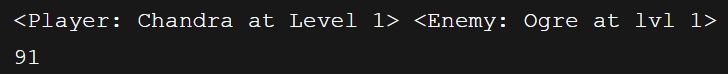

## Adding Attack to the Enemy Class: 

What's the point of an encounter if the enemy can't even attack, right? 
Let's add that same attack attribute that I added to the Player class:

In [ ]:
# II
class Enemy: 
    def __init__(self, kind, level) -> None:
        self.kind = kind
        self.level = level
        
    def __repr__(self) -> str:
        return ('<Enemy: {} at lvl {}>'.format(self.kind,
                                    self.level))

    # II-1
    def get_attack_power(self):
            return randint(1, 100) * self.level

And print it out:

In [ ]:
if __name__ == "__main__":
    # A1
    player_1 = Player(name="Chandra", level=1)
    ogre_1 = Enemy(kind="Ogre", level=1)
    print(player_1, ogre_1)
    print(player_1.get_attack_power())
    # A1b
    print(ogre_1.get_attack_power())

Of course I got the same output for my player and enemy but now I see the ogre damage too: "**5**". 

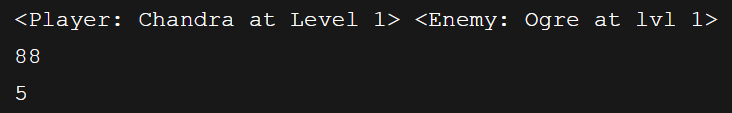

## **The main App: game.py**:

The file `actors.py` is not the game app itself, I coded there my classes. 

For the game app itself, I'm naming it `game.py`. I know, very original. 
Following what I decided for the game design, I want to add:
- an intro that will be printed every time the game starts and resets
- and a play function to actually start the game

So the file is in the folder `../app`. 

### main() & print_intro():

Here's the code of the first two functions I want to add:

In [ ]:
# G-I
def main():
    print_intro()
    play()

def print_intro():
    print(
    """
    ==== Magic The Quickening ====
    A Super Duper Fast 1 Combat Text Game!
    
        [Press Enter to Continue]
    """
    )
    input()

Let's unwrap that.  
The first function triggers the 2 functions I want. 

Just under it I declare one of these functions that is printing that intro 'splash screen'.  
**Without** the `input()` function there, the user would **not be able** to press enter, the prompt would just return to idle state. 

### **import classes & play()**:
I now add the second function, `play()`, which starts the game.  
But I need a player and an enemy, without both of them the game cannot happen. 

For that, I need to import the classes I defined earlier:

In [ ]:
# import A
from actors import Player, Enemy

I can use them now in the play() function:

In [ ]:
# G-Ib
def play():
    enemies =[
        Enemy('Bear', 1),
        Enemy('Wurm', 1)
    ]
    player = Player('Jace', 1)
    
    print(enemies)
    print(player)

if __name__ == '__main__':
    main()

So I added 2 enemies from the Class Enemy and 1 player from the Class Player and I printed them out to check them out.  

The last 2 lines are similar to what I added at the end of the actors.py file. The code in that game.py file will only be executed from within it.  

I can test run it:

### **Test Run**:
I see my intro 'splash screen' and I had to press Enter to get the rest of the print outs:  

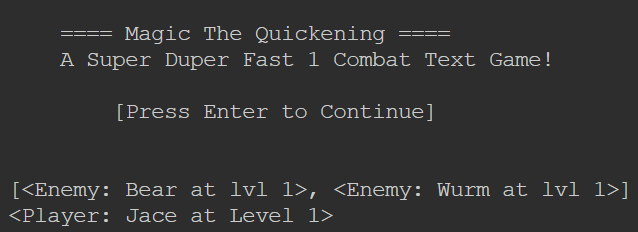

However the **game just stops there** and gets back to the terminal prompt.  
It **should continue** to run and give me the choices I decided to implement: attack, run and pass. 

### **while loop: run, attack, pass**:
I am adding the new logic under the comment # G-Ic:

In [ ]:
# G-Ib
def play():
    enemies = [Enemy("Bear", 1), Enemy("Wurm", 1)]
    player = Player("Jace", 1)

    # G-Ic
    while True: 
        next_enemy = random.choice(enemies)
        cmd = input(f'You see a {next_enemy.kind}. [r]un, [a]ttack, [p]ass?')
        
        if cmd == 'r':
            print("run")
        elif cmd == 'a':
            print("attack")
        elif cmd == 'p':
            print("pass")

`while True:` is very useful to **keep a loop going on** until a condition is met. Here the condition is pressing a key. But actually there is no way out of the loop, except for the generic CTRL + C. 

In this game, this loop will be ended anyway whenever the user wins, and every one wins.

Line 8 introduces a new module, `random` that does what is named after, randomizing from the list that is held by the variable `enemies`. For now it does not a lot as there are only 2 enemies in there.  
I imported that module at the top of the game.py file (# import B)

Line 9 is that input method again that is waiting for the user to make a choice among 3 keys to type: [r], [a], [p]. 

Let's test run this:

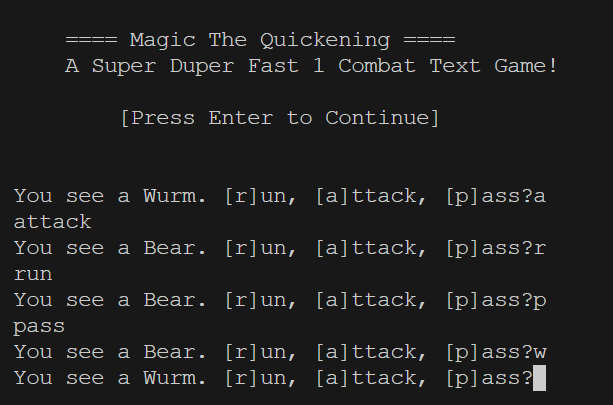

Up until I pressed '**w**' everything ran as expected.  

Just like I mentioned before, the game does not give us a way to exit the loop of that `while true:` statement. So **any other key just keeps the game running**. 

What I need here is a **"catch-all" prompt** prompting whenever any other key is typed. Here it is, added after the last elif statement of that previous code I added: 

In [ ]:
# G-Id
        else:
            print("Please choose a valid option")

Now I see that print whenever I press any other key, like g: 

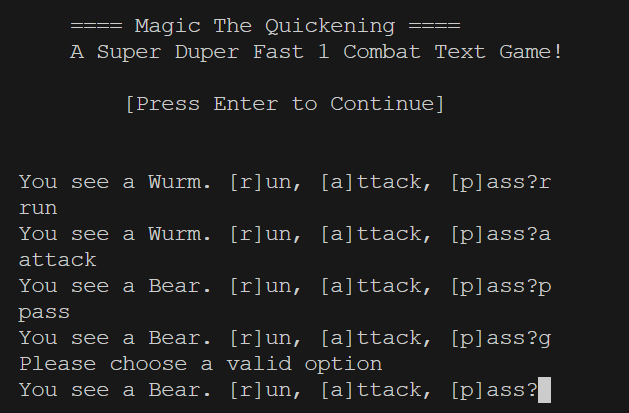

### **Better looks**:
The way the output looks is too dry to my taste. Also, the print is too minimal.  

I am adding the following: 

In [ ]:
# G-Ic
    while True:
        next_enemy = random.choice(enemies)
        cmd = input(f"You see a {next_enemy.kind}.\n[r]un, [a]ttack, [p]ass?")

        if cmd == "r":
            print(f"\n{player.name} runs away!")
        elif cmd == "a":
            print(f"\n{player.name} swings at {next_enemy.kind}!")
        elif cmd == "p":
            print(f"\npassing... Plan your next move!")
        # G-Id
        else:
            print("\nPlease choose a valid option")
            
        print()
        print('*'*40)
        print()

I changed the print of each action, line 7, 9 and 11. I added a line jump too.    
The three prints at lines 16 to 18 are jumping lines and in between is a bar made of 40 asterisks.  

The output below here is a lot more readable, the text and the layout 'breathe' better, it is more pleasing to the eyes:

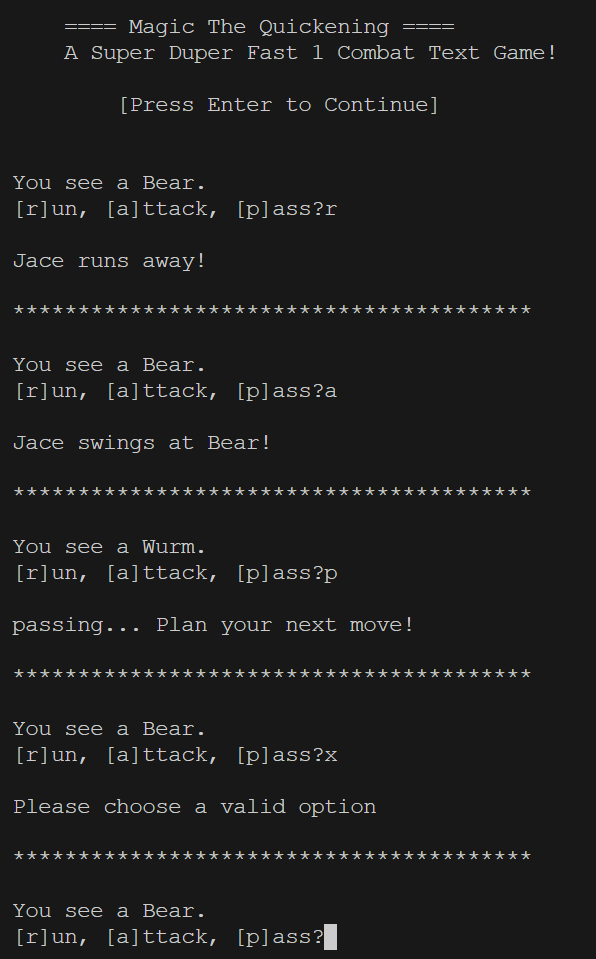

### **More attack logic**:
For now I am happy with what run and pass do, but for attack this is not enough. More logic is needed, I do not want the game to just print out who attacks what, there needs to be **an outcome out of each encounter**. 

That outcome can be: 
- a **win** for the user,
  - and in that case, the enemy encountered is **removed** from the list of encounters (`enemies`)
- or a **lose**,
  - and if so I just say that that player is **hiding**

So there will come a point where no enemies are left to encounter and in that case the user won the game. 

I could go deeper into the logic but the approach here is to go with **small increments, test and improve**.  
That is what I did so far and this approach, while slower, is less prone to cascade into many little issues down the road as it is often the case when more complexity is injected. 

So I am back at the `while True:` section of the code modifying the attack part (commented # G-Ie, line 11 to 15): 

In [ ]:
    # G-Ic
    while True:
        next_enemy = random.choice(enemies)
        cmd = input(f"You see a {next_enemy.kind}.\n[r]un, [a]ttack, [p]ass?")

        if cmd == "r":
            print(f"\n{player.name} runs away!")
        elif cmd == "a":
            print(f"\n{player.name} swings at {next_enemy.kind}!")

            # G-Ie
            if player.is_attacking(next_enemy):
                enemies.remove(next_enemy)
            else:
                print(f"{player.name} hides to plan the next move")

        elif cmd == "p":
            print(f"\npassing... Plan your next move!")

If an attack is triggered, after the print out the user 'is attacking', the enemy is removed off its list, otherwise the user hides. 

### **Updating Class Player**:
Obviously I did not add this 'is_attacking" method to the Class `Player` (in the actors.py file), so this will break the code. I need to add that too. 

In [ ]:
    # I-2
    def is_attacking(self, enemy):
        damage = self.get_attack_power()
        enemy_damage = enemy.get_attack_power()

        print(f"You dealt {damage}.")
        print(f"{enemy.kind} dealt {enemy_damage}!")

        if damage >= enemy_damage:
            print(f"You are victorious!")
            return True
        else:
            print(f"No...! {enemy.kind} defeated you!")

From the method `.get_attack_power()` I instantiate a player's damage, same for the enemy with `enemy_damage`.  

I print it out nicely for the user to get an instant feedback and know about it.  
An then I compare them and give an outcome accordingly. 

A test run ended up with the game breaking, giving me this error message: 
`IndexError: Cannot choose from an empty sequence`  
So what happened is that:
- I got defeated by the first Wurm, 
- then I defeated the second one, removing it from the list of encounters, 
- and then I defeated the Bear, also removing it, 
- which resulted in an empty list (because the list only has 2 enemies)

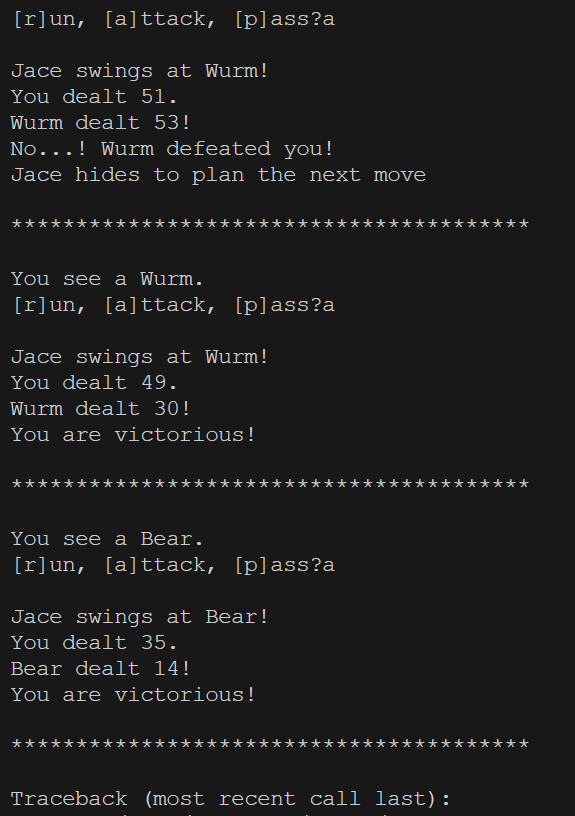

## **Game Ending Condition**:

So I need to add logic that will give to the user a feedback saying that he defeated all enemies and won, which will break out of the while loop instead of breaking the game.  

That new code has to go to the `game.py` file, at the end of `play()` method. 

In [ ]:
        # G-J
        if not enemies:
            print("You defeated all the enemies!\n\tCONGRATULATIONS!!!")
            break

Line 2 is equivalent to:
- if len(enemies) == 0:
  - meaning if the list of enemies is empty

Writing it with the `not` operator is just better. 

Another test run confirms the code is working properly: 

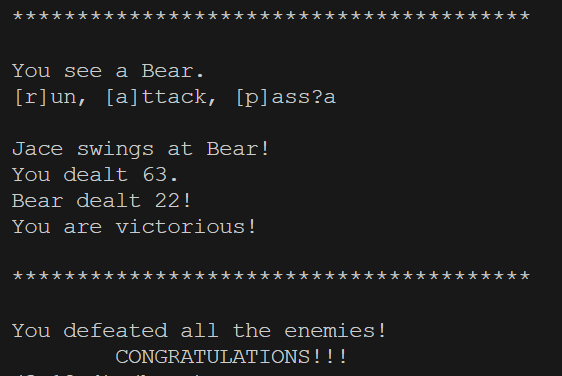

# **Turn the Game into a Class of its Own**: 

It's time to get a little more serious. I want the game to have 3 difficulty levels, each with a different set of enemies.  

Instead of copying the same code again for each different difficulty level, I can leverage the OOP side of Python and make the whole game a Class. I will then be able to make a new object, a new level that is, with specific changes on the go. In other terms, I will use inheritance to make 3 games objects from a new class Game. 

So here I am in game.py, declaring this new class: 

In [ ]:
# I-a
class Game:
    def __init__(self, player, enemies) -> None:
        self.player = player
        self.enemies = enemies

Any new Game object has to have a player object and an enemies object.  
To test this out I need to create that new Game object at the bottom:

In [ ]:
if __name__ == "__main__":
    #main()
    player = Player(name="Gideon", level=1)
    enemies = [
               Enemy('Dragon', 1),
               Enemy('Soldier', 1)
               ]
    game = Game(player, enemies)
    print(f"\n{game}\n")

At line 2 I disabled the main() call so taht I can run what I want to add below it. 

I instantiated a new player and enemies objects as well as a game object.  
The Game class has not play() method yet so I will just print it out. 


My terminal is confirming in the print out that game is indeed a Game object: 

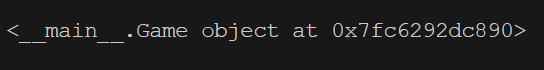

## **Any new player & enemies objects**:

To be sure that my new player and enemies list were indeed used by that game object I am going to print them out: 

In [ ]:
    print(f"\n{game}\n")
    print(f"{game.player}\n")
    print(f"{game.enemies}\n")

And indeed they were. So I can use any player and enemies objects, I am not limited by the previous ones.  

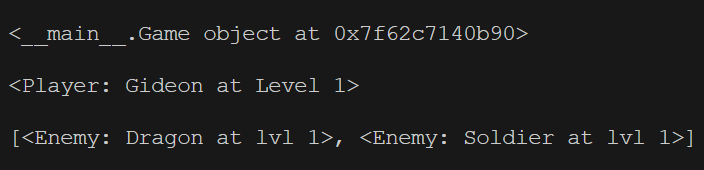

## **continuing: Encapsulation**: 

I still want the same intro and play method. I can just reuse the one I wrote earlier BUT because it is now a method of a class (and not just a function anymore), it needs the `self` argument:

In [ ]:
    # G-I
    def main(self):
        self.print_intro()
        #play()

Note that the block of code is not indented, of course, it is now part of the Game class. 

Line 2 I added the self argument and also right before the method print_info().  
Right there, what I just did is an example of an encapsulation. Which means that I added that function main() that is printing out an intro text, and that whole addition is part of the Game class. Rather complex **things are happening TOGETHER, bundled together** (encapsulated) instead of being gathered and put together from different files. 

Obviously I need to update the print_intro(_) method too, and I did there was to add self as an argument:

In [ ]:
    # I-b
    def print_intro(self):
        print(
            """
        ==== Magic The Quickening ====
        A Super Duper Fast 1 Combat Text Game!
        
            [Press Enter to Continue]
        """
        )
        input()

And for the next test run I commented out the 2 previous print outs and just added a call to `game.main()`:

In [ ]:
    #print(f"{game.player}\n")
    #print(f"{game.enemies}\n")
    game.main()

The intro was printed out and I could press Enter, which as expected broke the game: 

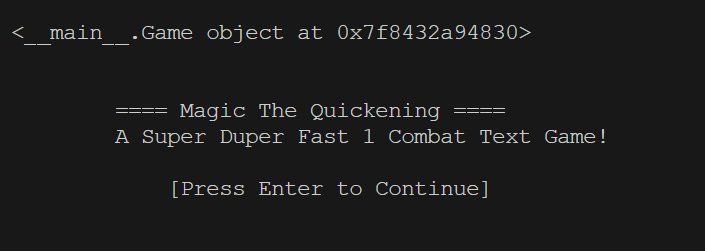

## reimplementing play() in class Game():

To get the game actually starting I could just indent the whole play() method and add self as an argument. But this could lead to more bugs down the road, so let's play it safe and go slow. 

Originally I created player and enemies inside that play() function. Both are now already inside the game.py app, I just created them (2 new player and enemies objects). So they should consequently be within the scope of the whole Game class, and so within its play method too.  
That also means I do not need to create them there like I originally did.  

However, the whole `while True:` loop is still needed to keep the game running. 
I am just adding that random.choice again on the enemies list to get a random encounter and test it out: 

In [ ]:
    # I-c
    def play(self):
        while True:
            next_enemy = random.choice(self.enemies)
            print(f"\nEncountering: {next_enemy}")
            break

For the play() method to be ran, I need to uncomment it and add that self class reference before it:

In [ ]:
    # G-I
    def main(self):
        self.print_intro()
        self.play()

Everything is going as expected: 

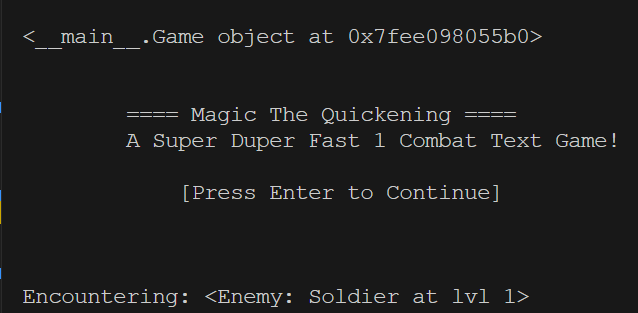

Time to add the rest of the play() logic: 

In [ ]:
    # I-c
    def play(self):
        while True:
            next_enemy = random.choice(self.enemies)
            #print(f"\nEncountering: {next_enemy}")
            #break

            # I-d
            cmd = input(f"You see a {next_enemy.kind}.\n[r]un, [a]ttack, [p]ass?")
            if cmd == "r":
                print(f"\n{self.player.name} runs away!")
            elif cmd == "a":
                print(f"\n{self.player.name} swings at {next_enemy.kind}!")

                if self.player.is_attacking(next_enemy):
                    self.enemies.remove(next_enemy)
                else:
                    print(f"{self.player.name} hides to plan the next move")
            elif cmd == "p":
                print(f"\npassing... Plan your next move!")
            else:
                print("\nPlease choose a valid option")

I disabled the break otherwise the rest of the logic will not be executed. 

And again, because play() is a method of Game class, it need to reference itself. So I had to add that self before the objects player and enemies if I want to use the ones that are integral to it.  

The test run shows that the game runs as expected until I meet the condition for a game end, at which point the game just broke. THis is normal, I did not add the condition to the Game class.  

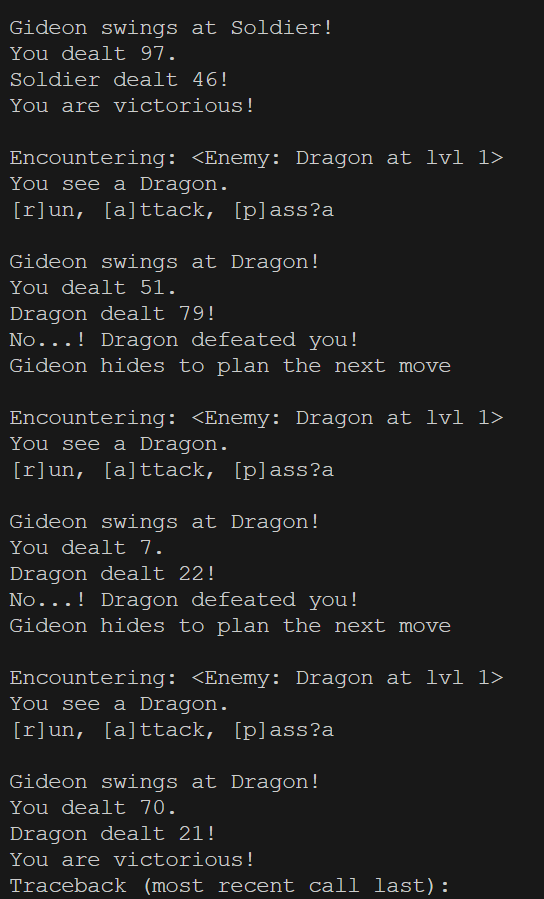

What is missing are these break lines and the asterisks bar and also the condition, which if using that enemies object (line 5), and that means a self is needed before it:

In [ ]:
            print()
            print("*" * 40)
            print()

            if not self.enemies:
                print("You defeated all the enemies!\n\tCONGRATULATIONS!!!")
                break

A new test run confirms that new code addition: 

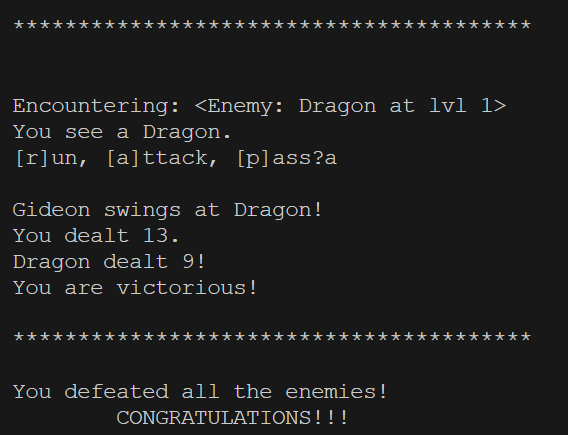

## Clean up: 

The game is back to what it was and it is now a whole class of its own instead of a function.  
I need to do some clean up to keep the code in game,py minimal and readable.  

The whole original play() function can now be deleted, I do not need anymore. 

In [ ]:
# G-Ib
def play():
    ...

And the last code block is now down to this:

In [ ]:
if __name__ == "__main__":
    player = Player(name="Gideon", level=1)
    enemies = [Enemy("Dragon", 1), Enemy("Soldier", 1)]
    Game(player, enemies).main()

I am still injecting the new player and enemies list but this time instead of instantiating a game object I just run the class itself and call its main function. 

# **making it prettier**: 

Remember these 3 lines of prints? I can just refactor them into a one line function: 

In [ ]:
    # I-e
    def print_linebreaks(self):
        print()
        print("✨" * 25)
        print()

The self as an argument is not needed but it is best practice. 

I chose to go with emojis instead of a legacy looking asterisk and now 40 of those is too much so I made it 25. Of course I now need to call it where I need it. 

In [ ]:
            # I-j
            self.print_linebreaks()

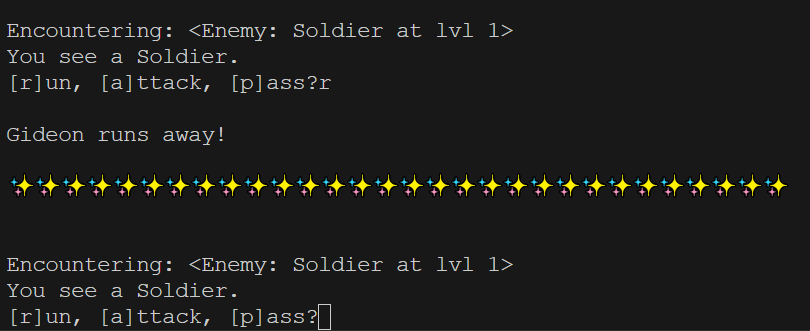

### More emojis and Game-like slow process:

I want to continue on the emoji path and add more of them. 
I let you look at the play() function to see al the changes, or you could just run the game t osee them all.  

Also, to add a legacy game flavour I want to add code that mimic how old PCs were thinking for half a second before they printed out or ran anything. 

I want it at:
- the beginning before and after I press enter
- whenever an action is chosen: so for run, attack, pass
- when any other key is typed
- before any encounter is randomly chosen

For that I need to import the module time and use its slep() method:

In [ ]:
    # I-b
    def print_intro(self):
        print(
            """
        ==== Magic The Quickening ====
        A Super Duper Fast 1 Combat Text Game!
        """
        )
        
        time.sleep(1)
        print(f"\n\t[Press Enter to Continue]\n\n")
        input()
        
        # J-a
        time.sleep(0.5)

Here I split the print into 2 prints, the second is delayed by 1 second and I added a 1/2 second delay after pressing enter.

I am adding this same line where I want it. 
So I added these delays wherever I found them great to have, and I decided thanks to many test runs. 

I also added a small line that clears the terminal when the game is started and when it is ended:

In [ ]:
# k-a
os.system("cls" if os.name == "nt" else "clear")
break